In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pdf = sns.load_dataset('penguins')
pdf.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
strcols = pdf.dtypes[pdf.dtypes == 'object'].index.tolist()
strcols

['species', 'island', 'sex']

In [6]:
numcols = pdf.dtypes[pdf.dtypes != 'object'].index.tolist()
numcols

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

## find missing entries in each column

In [7]:
pdf.shape[0]

344

In [8]:
100*pdf.isna().sum()/pdf.shape[0]

species              0.000000
island               0.000000
bill_length_mm       0.581395
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  3.197674
dtype: float64

-- Fill all missing values

In [9]:
for col in numcols:
  pdf[col]= pdf[col].fillna(pdf[col].mean())

In [10]:
100*pdf.isna().sum()/pdf.shape[0]

species              0.000000
island               0.000000
bill_length_mm       0.000000
bill_depth_mm        0.000000
flipper_length_mm    0.000000
body_mass_g          0.000000
sex                  3.197674
dtype: float64

In [11]:
pdf2 = pdf[:]
pdf2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


In [12]:
pdf2.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
pdf2.sex.value_counts()

Male      168
Female    165
Name: sex, dtype: int64

In [ ]:
 pdf2.sex.mode().values[0]

'Male'

In [ ]:
pdf2.sex= pdf2.sex.fillna(pdf2.sex.mode().values[0])


In [ ]:
100*pdf2.isna().sum()/pdf2.shape[0]

species              0.0
island               0.0
bill_length_mm       0.0
bill_depth_mm        0.0
flipper_length_mm    0.0
body_mass_g          0.0
sex                  0.0
dtype: float64

In [ ]:
pdf2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


In [ ]:
pdf2.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
species_dic = {val:num for num,val in enumerate(pdf2.species.unique())}
species_dic

{'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}

In [ ]:
species_isl = {val:num for num,val in enumerate(pdf2.island.unique())}
species_isl

{'Biscoe': 1, 'Dream': 2, 'Torgersen': 0}

In [ ]:
species_sex = {val:num for num,val in enumerate(pdf2.sex.unique())}
species_sex

{'Female': 1, 'Male': 0}

In [ ]:
catnums = { **species_dic ,**species_isl , **species_sex}
catnums

{'Adelie': 0,
 'Biscoe': 1,
 'Chinstrap': 1,
 'Dream': 2,
 'Female': 1,
 'Gentoo': 2,
 'Male': 0,
 'Torgersen': 0}

In [ ]:
pdf2[strcols].applymap(lambda x :catnums.get(x)).head()

,species,island,sex
0,0,0,0
1,0,0,1
2,0,0,1
3,0,0,0
4,0,0,1


In [ ]:
pdf2.loc[:,strcols] = pdf2[strcols].applymap(lambda x :catnums.get(x))
pdf2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.10000,18.70000,181.000000,3750.000000,0
1,0,0,39.50000,17.40000,186.000000,3800.000000,1
2,0,0,40.30000,18.00000,195.000000,3250.000000,1
3,0,0,43.92193,17.15117,200.915205,4201.754386,0
4,0,0,36.70000,19.30000,193.000000,3450.000000,1


In [ ]:
#pdf2.to_csv("Penguins_Unscaled.csv",index=False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mmscaler = MinMaxScaler()

In [ ]:
scaler = mmscaler.fit(pdf2[numcols])

In [ ]:
scaler.data_min_

array([  32.1,   13.1,  172. , 2700. ])

In [ ]:
scaler.data_max_

array([  59.6,   21.5,  231. , 6300. ])

In [ ]:
pdf2.describe()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,0.918605,1.209302,43.921930,17.151170,200.915205,4201.754386,0.479651
std,0.893320,0.684970,5.443643,1.969027,14.020657,799.613058,0.500313
min,0.000000,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,0.000000,1.000000,39.275000,15.600000,190.000000,3550.000000,0.000000
50%,1.000000,1.000000,44.250000,17.300000,197.000000,4050.000000,0.000000
75%,2.000000,2.000000,48.500000,18.700000,213.000000,4750.000000,1.000000
max,2.000000,2.000000,59.600000,21.500000,231.000000,6300.000000,1.000000


In [ ]:
scaled = scaler.transform(pdf2[numcols])

In [ ]:
scaled

array([[0.25454545, 0.66666667, 0.15254237, 0.29166667],
       [0.26909091, 0.51190476, 0.23728814, 0.30555556],
       [0.29818182, 0.58333333, 0.38983051, 0.15277778],
       ...,
       [0.66545455, 0.30952381, 0.84745763, 0.84722222],
       [0.47636364, 0.20238095, 0.6779661 , 0.69444444],
       [0.64727273, 0.35714286, 0.69491525, 0.75      ]])

In [ ]:
pdf_scaled = pd.DataFrame(scaled,columns=numcols)
pdf_scaled.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0.254545,0.666667,0.152542,0.291667
1,0.269091,0.511905,0.237288,0.305556
2,0.298182,0.583333,0.389831,0.152778
3,0.429888,0.482282,0.490088,0.417154
4,0.167273,0.738095,0.355932,0.208333


In [ ]:
pdf_scaled.insert(0,pdf2.columns[0],pdf2[pdf2.columns[0]])
pdf_scaled.insert(1,pdf2.columns[1],pdf2[pdf2.columns[1]])
pdf_scaled.insert(6,pdf2.columns[6],pdf2[pdf2.columns[6]])

In [ ]:
pdf_scaled.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,0.254545,0.666667,0.152542,0.291667,0
1,0,0,0.269091,0.511905,0.237288,0.305556,1
2,0,0,0.298182,0.583333,0.389831,0.152778,1
3,0,0,0.429888,0.482282,0.490088,0.417154,0
4,0,0,0.167273,0.738095,0.355932,0.208333,1


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')


KeyboardInterrupt: ignored

In [ ]:
#pdf_scaled.to_csv('/content/drive/MyDrive/Penguin.csv', index=False)

In [ ]:
#pdf_scaled.to_csv("Penguin_scaled.csv",index=False)

In [ ]:
X = pdf_scaled.drop('species',axis=1)
y = pdf_scaled.species

In [ ]:
X.shape,y.shape

((344, 6), (344,))

In [ ]:
#penguin = pd.read_csv('https://raw.githubusercontent.com/Manju410/MLPractice/main/data/Penguin.csv')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)

In [ ]:
model.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

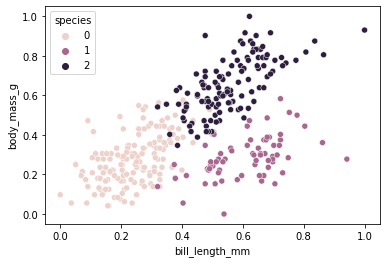

In [ ]:
sns.scatterplot(x='bill_length_mm',y='body_mass_g',data=pdf_scaled,hue=y)

In [ ]:
model.score(X,y)

0.9941860465116279